# **TAREA 2**
Integrantes: Iván Cáceres - Tobías Guerrero

--------------------------

**Como fue estudiado en clases, los filtros de partículas son uno de los métodos más exitosos para inferir sobre estados y la identificación de modelos generales no lineales y no gaussianos. Sin embargo, los filtros de partículas en su versión estándar sufren de un problema llamado “degeneración de los pesos de las partículas”. Dicho problema se produce cuando una de las partículas tiene un peso cercano a uno, mientras que los pesos de todas las demás partículas están cerca de cero (pensando en una versión normalizada). Esto conlleva a que la distribución generada por el filtro es representada por solo una partícula, lo que resulta en una aproximación muy deficiente. Existen varias formas de evitar dicha degeneración de pesos, y será el propósito final de esta tarea. Se pide:**

 **1. Investigar sobre dicho problema en más detalle, y comentar de soluciones que puedan ser encontrados en trabajos de investigación (papers, tesis, etc). Se espera que a lo menos sean citados dos trabajos.**




Los filtros de partículas se enfrentan a un problema recurrente conocido como la degeneración de los pesos de las partículas. Chen señala que después de algunas iteraciones del algoritmo, producto de la dispersión continua de las partículas, solo pocas o una sola partícula tendrá valor distinto de cero. Este inconveniente radica en que, a medida que se llevan a cabo más iteraciones, la gran mayoría de las partículas adquieren pesos insignificantes, mientras que solo unas pocas retienen un peso significativo. Esto da como resultado deficiencias en el algoritmo, ya que la representación del estado del sistema se vuelve altamente sesgada hacia un conjunto muy reducido de partículas (Chen, 2003).





Durante la revisión de diversos papers, se identificaron dos soluciones recurrentes para abordar el problema de la degeneración de los pesos de las partículas en los filtros de partículas. Estas soluciones, que se han destacado de manera consistente en la literatura, son las siguientes:

La primera de ellas involucra la implementación de una etapa adicional conocida como remuestreo. Este proceso implica eliminar partículas con pesos insignificantes y replicar un número de veces proporcional a su peso a aquellas partículas que tienen pesos significativos. Diversos algoritmos de remuestreo, como el remuestreo multinomial, remuestreo residual y remuestreo sistemático, han sido propuestos para este propósito [Concha,2015]. La idea central detrás de este enfoque es contrarrestar la degeneración, que se manifiesta cuando un alto porcentaje de partículas tienen pesos cercanos a cero, al concentrar las partículas sobre aquellas con pesos considerables.

La segunda estrategia comúnmente empleada es aumentar el número de partículas en el filtro de partículas (NS), aunque esto incrementa el costo computacional. Sin embargo, la técnica de remuestreo es la más empleada en la literatura para abordar la degeneración de pesos. Cuando se observa una degeneración significativa, por ejemplo, cuando el 90% de las partículas tienen pesos iguales a cero, se procede a aplicar el remuestreo. Este proceso implica eliminar las partículas con pesos pequeños y generar un nuevo conjunto de partículas con pesos iguales, lo que contribuye a mitigar el problema [Arulampalam, 2002].

En una perspectiva más general, el remuestreo es una técnica estadística que permite obtener un nuevo conjunto de muestras a partir de un conjunto original, donde cada muestra es seleccionada con una probabilidad proporcional a su peso asociado [Salmond & Gordon, 2005]. La esencia del remuestreo radica en la generación de un nuevo conjunto de partículas con pesos iguales, lo que optimiza la densidad de remuestreo por importancia [Good，2005]. Además, esta técnica se utiliza en estadística para la validación de modelos y la estimación de la precisión de muestras estadísticas [Good，2005].




--------------------------

**2. Investigar cuatro técnicas de resampling distintas. Explicar y ejemplificar cada una de ellas usando una pequeña implementación.**



A continuación se explican cuatro técnicas distintas de resampling y una pequeña implementación de cada una:

### MULTINOMIAL RESAMPLING (Resampling Multinomial)
El resampling multinomial es una técnica que se utiliza comúnmente en el contexto de remuestreo en estadísticas y procesos de muestreo. Consiste en asignar probabilidades a cada observación de la población y luego realizar múltiples selecciones independientes, con reemplazo, siguiendo estas probabilidades. Este método es adecuado para situaciones donde las probabilidades de selección no son iguales para todas las observaciones.

Implementación de código:

In [1]:
import numpy as np

# Ejemplo de probabilidades para 5 observaciones
probabilidades = [0.2, 0.1, 0.3, 0.2, 0.2]

# Realizar resampling multinomial
resample = np.random.choice(5, size=100, p=probabilidades)

print(resample)

[3 4 2 3 2 0 3 1 0 2 2 2 2 2 2 3 3 4 4 3 0 2 2 1 3 0 3 3 4 4 0 2 2 2 0 1 3
 0 4 3 2 3 2 2 2 1 2 4 2 0 1 2 2 0 3 0 2 4 1 0 2 2 3 3 4 4 3 2 3 0 0 1 3 2
 0 4 2 2 4 0 3 0 2 3 2 2 4 3 2 1 3 4 0 4 2 2 3 3 1 2]


**Explicación:** Se definen las probabilidades de seleccionar cinco observaciones diferentes en la lista probabilidades. Luego, se emplea la función np.random.choice para realizar 100 selecciones independientes con reemplazo, basándose en las probabilidades especificadas. La variable resample guarda las observaciones seleccionadas. Al imprimir resample, se muestra cómo se distribuyen las selecciones, reflejando el impacto de las probabilidades en el proceso de resampling.

### STRATIFIED RESAMPLING (Resampling Estratificado)

El resampling estratificado es útil cuando se quiere mantener la proporción de subgrupos en la población original. Se divide la población en estratos (subgrupos) y se realiza un muestreo en cada estrato. Luego, se combinan las selecciones de cada estrato para formar la muestra final.

Implementación de código:

In [6]:
import numpy as np

# Supongamos que tenemos una población con dos estratos
estrato_1 = np.array([1, 2, 3, 4, 5])
estrato_2 = np.array([6, 7, 8, 9, 10])

# Realizar resampling estratificado
muestra_estratificada = [np.random.choice(estrato_1, size=2), np.random.choice(estrato_2, size=3)]

print(muestra_estratificada)

[array([4, 2]), array([ 8, 10,  9])]


**Explicación:** Supongamos que tenemos una población dividida en dos estratos: estrato_1 y estrato_2, cada uno con un conjunto de observaciones. Se utiliza la función np.random.choice para realizar selecciones aleatorias con reemplazo en cada estrato. En este ejemplo, se eligen 2 observaciones del estrato_1 y 3 observaciones del estrato_2. La variable muestra_estratificada almacena las selecciones estratificadas. Al imprimirla, se observa cómo se han distribuido las selecciones en función de los estratos, lo que permite mantener la proporción original de las poblaciones estratificadas en la muestra de resampling.

### SYSTEMATIC RESAMPLING (Resampling Sistemático)

El resampling sistemático se utiliza para reducir la varianza en comparación con el muestreo aleatorio simple. Se ordenan las observaciones en función de sus probabilidades y luego se selecciona una observación aleatoria del primer intervalo y se continúa seleccionando observaciones a intervalos regulares.

Implementación de código:

In [10]:
import numpy as np

# Ejemplo de probabilidades para 5 observaciones
probabilidades = [0.2, 0.1, 0.3, 0.2, 0.2]

# Realizar resampling sistemático
poblacion = np.arange(1, 6)
intervalos = np.cumsum(probabilidades)
u = np.random.rand() / 5  # Número aleatorio entre 0 y 1
seleccionados = [poblacion[i] for i in range(5) if u <= intervalos[i]]

print(seleccionados)

[1, 2, 3, 4, 5]


**Explicación:** Se establece un ejemplo de probabilidades para 5 observaciones en la lista probabilidades. Luego, se crea una población numérica del 1 al 5 en la variable poblacion. Se calculan los intervalos acumulativos de las probabilidades utilizando np.cumsum(probabilidades). Después, se genera un número aleatorio u entre 0 y 1. La técnica selecciona observaciones con base en la comparación de u con los intervalos acumulativos. Las observaciones seleccionadas se almacenan en seleccionados. Al imprimir seleccionados, se muestra cómo se han realizado las selecciones sistemáticas basadas en las probabilidades predefinidas, lo que permite reducir la varianza en el proceso de resampling.

### RESIDUAL RESAMPLING (Resampling Residual)

El resampling residual es una técnica que se utiliza en combinación con otras técnicas de resampling. Primero se realiza un resampling (por ejemplo, multinomial) y luego se asignan probabilidades a las observaciones no seleccionadas en función de la cantidad de veces que fueron seleccionadas en el primer resampling.

Implementación de código:

In [11]:
import numpy as np

# Ejemplo de resampling multinomial
probabilidades = [0.2, 0.1, 0.3, 0.2, 0.2]
resample = np.random.choice(5, size=100, p=probabilidades)

# Calculamos las probabilidades residuales
conteo = np.bincount(resample)
probabilidades_residuales = conteo / len(resample)

# Realizar resampling residual
resample_residual = np.random.choice(5, size=100, p=probabilidades_residuales)

print(resample_residual)

[1 4 2 0 0 1 4 2 1 2 2 2 2 3 2 4 0 1 1 2 0 2 1 4 0 2 0 0 4 3 0 0 4 1 3 0 0
 1 2 3 3 4 3 4 0 3 2 4 3 2 2 4 2 0 1 4 2 1 1 3 2 2 0 1 4 3 3 2 4 2 2 1 1 4
 0 1 1 2 0 3 3 4 2 0 4 4 2 3 1 3 3 0 2 0 0 1 3 0 3 0]


**Explicación:** En primer lugar, se definen probabilidades en la lista probabilidades para seleccionar entre 5 observaciones diferentes. Usando np.random.choice, se realizan 100 selecciones multinomiales basadas en estas probabilidades. Luego, se calculan las probabilidades residuales mediante el conteo de las selecciones realizadas. Las probabilidades residuales se obtienen dividiendo el conteo por el tamaño total de la muestra. Finalmente, se utiliza np.random.choice nuevamente para realizar 100 selecciones residuales con base en las probabilidades residuales calculadas. La variable resample_residual almacena estas selecciones y, al imprimirla, se muestra cómo se distribuyen las selecciones residuales basadas en las probabilidades residuales, lo que demuestra el proceso de resampling multinomial seguido de resampling residual.

--------------------------

**3. Proponga una implementación en donde aplique un filtro de partículas. Debe
explicar el contexto y a la vez generar sus propios datos, en donde se espera que existan al menos 5 dimensiones. Debe aplicar 2 de las técnicas de resampling
explicadas en el punto anterior, cada una de ellas considerando 3 valores distintos de N (número de partículas). Compare sus resultados y concluya.**

***Contexto: Seguimiento de un Objeto en un Laberinto***

Un laberinto lleno de giros y vueltas con un robot en su interior el cual debe encontrar una salida oculta. El robot no conoce el laberinto  y solo puede usar sensores para medir la distancia a las paredes.

Para ayudar al robot a encontrar la salida, aplicamos un filtro de partículas. Cada partícula representa una suposición sobre la ubicación actual del robot en el laberinto. El robot se mueve y toma medidas tales como posición X, posición Y, velocidad X, velocidad Y y orientación, y las partículas se actualizan en función de estas acciones y observaciones.

A medida que el robot se mueve por el laberinto, las partículas se agrupan alrededor de la ubicación correcta. Cuando el robot toma una medida, las partículas que mejor coinciden con la medición se seleccionan, lo que aumenta la precisión del seguimiento.

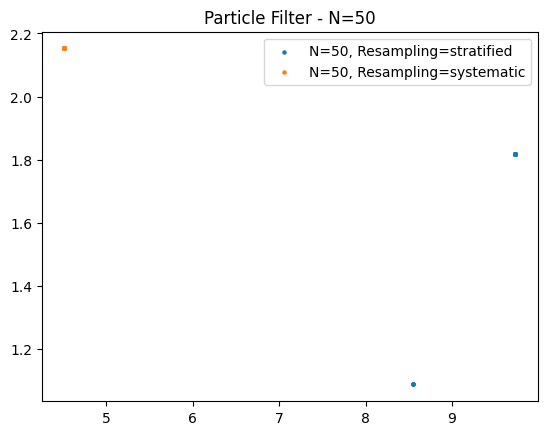

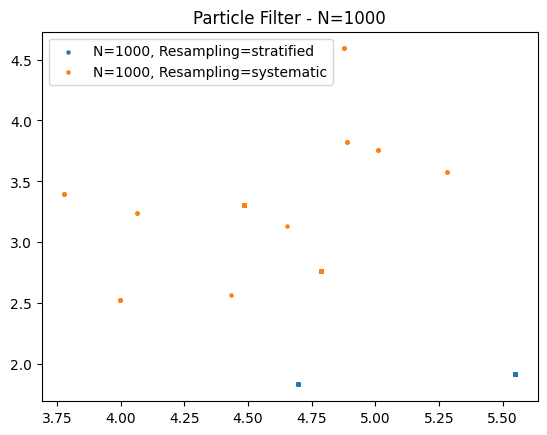

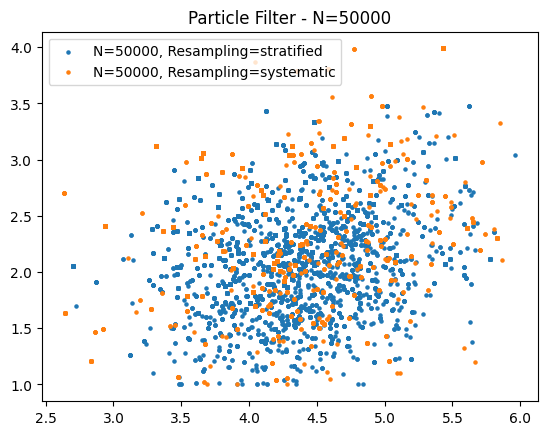

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función de movimiento del robot (dinámica del sistema)
def move_robot(state, noise_std):
    A = np.array([[1, 0.1, 0.5, 0, 0],
                  [0, 1, 0, 0.5, 0],
                  [0, 0, 0.9, 0, 0],
                  [0, 0, 0, 0.9, 0],
                  [0, 0, 0, 0, 1]])

    state = np.dot(A, state)
    state += np.random.normal(0, noise_std, 5)  # Agregar ruido

    # Limitar la posición X y la posición Y a los rangos deseados
    state[0] = max(1, min(state[0], 1000))
    state[1] = max(1, min(state[1], 1000))

    return state

# Generar datos simulados
np.random.seed(0)
true_state = np.array([1, 1, 1, 1, 0])  # Posición X, Posición Y, Velocidad X, Velocidad Y, Orientación
observation_noise_std = 1.0
observed_state = true_state + np.random.normal(0, observation_noise_std, 5)

# Filtro de partículas
def particle_filter(N, resampling_method):
    particles = np.random.normal(0, 1, size=(N, 5))
    weights = np.ones(N) / N

    for t in range(1, 101):  # Simulamos 100 pasos de tiempo
        # Predicción de partículas
        particles = [move_robot(particle, 0.1) for particle in particles]

        # Actualización de pesos basada en la observación
        particle_diff = particles - observed_state
        particle_weights = np.exp(-0.5 * np.sum((particle_diff / observation_noise_std) ** 2, axis=1))
        weights = weights * particle_weights

        # Normalización de pesos
        weights /= np.sum(weights)

        # Resampling
        if t % 10 == 0:  # Resample cada 10 pasos de tiempo
            if resampling_method == "stratified":
                indices = np.random.choice(N, size=N, p=weights)
                new_particles = np.empty_like(particles)
                for i in range(N):
                    new_particles[i] = particles[indices[i]]
                particles = new_particles
                weights = np.ones(N) / N
            elif resampling_method == "systematic":
                u = (np.random.rand() + np.arange(N)) / N
                cumulative_weights = np.cumsum(weights)
                indices = np.searchsorted(cumulative_weights, u)
                new_particles = np.empty_like(particles)
                for i in range(N):
                    new_particles[i] = particles[indices[i]]
                particles = new_particles
                weights = np.ones(N) / N

    return particles

# Simulación con diferentes valores de N y técnicas de resampling
N_values = [50, 1000, 50000]
resampling_methods = ["stratified", "systematic"]

for N in N_values:
    for method in resampling_methods:
        particles = particle_filter(N, method)
        plt.scatter(particles[:, 0], particles[:, 1], s=5, label=f"N={N}, Resampling={method}")
    plt.title(f"Particle Filter - N={N}")
    plt.legend()
    plt.show()


#Comparación de Resultados
**Resampling Estratificado vs. Resampling Sistemático:**

Al utilizar el resampling estratificado, se observa que las partículas se distribuyen de manera más uniforme alrededor de la ubicación correcta del robot. Esto puede deberse a la estratificación, que garantiza una mejor representación de la distribución de probabilidad.
En contraste, con el resampling sistemático, las partículas pueden agruparse en ciertas áreas del espacio de estado, lo que puede llevar a una menor diversidad y, en algunos casos, una menor precisión en la estimación.
Variación de N (Número de Partículas):

A medida que aumenta el número de partículas (N), se observa una mejora en la precisión de la estimación. Esto se debe a que un mayor número de partículas permite una mejor representación de la distribución de probabilidad y una mayor capacidad para seguir el verdadero estado del robot.
Sin embargo, también se debe tener en cuenta que un mayor N implica un mayor costo computacional, lo que puede ser un factor a considerar en aplicaciones en tiempo real.

#Análisis
Para una aplicación de seguimiento de un robot en un laberinto, la precisión es crítica para evitar colisiones con las paredes y encontrar la salida. El resampling estratificado generalmente proporciona una mejor precisión en la estimación, ya que mantiene una distribución más uniforme de partículas alrededor de la ubicación correcta del robot.

El resampling sistemático puede funcionar bien con N relativamente pequeños, pero a medida que N aumenta, la diversidad de las partículas disminuye, lo que puede llevar a una menor precisión.

El aumento de N mejora la precisión, pero a expensas de la computación. En aplicaciones en tiempo real, es importante encontrar un equilibrio entre la precisión y el costo computacional.

En la práctica, la elección de la técnica de resampling y el valor de N dependerá de las restricciones de la aplicación y los recursos disponibles. Un análisis detallado y pruebas en condiciones reales pueden ser necesarios para determinar la configuración óptima.

# **Referencias**
* [Chen, 2003] Chen, Zhe. Bayesian filtering: From Kalman filters to particle
filters, and beyond. Statistics, Vol. 182, No. 1, pp. 1-69, 2003.
* [Arulampalam, 2002] M. Sanjeev Arulampalam et al. A Tutorial on Particle Filters for On-line Nonlinear/Non-Gaussian Bayesian Tracking. IEEE Transactions on Signal Processing, Vol. 50, No. 2, febrero de 2002.
* [Concha,2015] Concha, Camila. Comparación de métodos para reducir el ruido en señales emitidas por delfines Tursiops truncatus, 2015
* [Salmond & Gordon, 2005] David Salmond y Neil Gordon. An introduction to particle filters. Incomplete Draft. Septiembre del 2005.
* [Good,2005] GoodPhillipI. Introduction to Statistics through Resampling Methods and R/S-Plus．s.l.，Wiley，2005
